# CS 109A/STAT 121A/AC 209A/CSCI E-109A

## Standard Section 8: Multiclass Model and Midterm Review

**Harvard University**<br/>
**Fall 2017**<br/>
**Section Leaders: Albert Wu, Nathaniel Burbank<br/>**
**Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine** 

<center>**Download this notebook from the CS109 repo or here:**</center>
<center>**http://bit.ly/Sec_8_109a**</center>

This section can be split into two major parts. The first covers multiclass model fitting and is designed to help you get started on HW 7. The second part goes over midterm 2 from 2016 and is designed to help you prepare for the upcoming midterm. 

Specifically, we will: 
    
    1. Use the iris dataset, which we used in section 3, to cover multiclass models and fitting them.
    2. Dive into midterm 2 from last year and go through a thorough review of the solutions that were posted.

In [95]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Part 0: Fitting Multiclass Models to the Iris Dataset

This first part, part 0, is designed to help you get started on the first part of the homework. The dataset we use is similar to that of section 3, where we had flower type as our predictor (0,1,2). Here we will focus on sepal length and petal width as our predictors. We will fit and compare the training and test accuracies of the following classification methods:

- Multiclass Logistic Regression (Multinomial and one-vs-rest (OvR))
- Multiclass Logistic Regression cubic terms
- Linear Discriminant Analysis
- Quadratic Discriminant Analysis
- k-Nearest Neighbors

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/cs109/a-2017/master/Sections/Standard/s8_data/section_8_data.csv')
msk = np.random.rand(len(df)) < 0.5
data_train_2 = df[msk]
data_test_2 = df[~msk]
data_train_2.head()

,slength,pwidth,target
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
4,5.0,0.2,0
5,5.4,0.4,0


The column `target` contains our three types of flowers (0,1,2), while `slength` and `pwidth` are the sepal legnth and petal width for each specific flower observation.

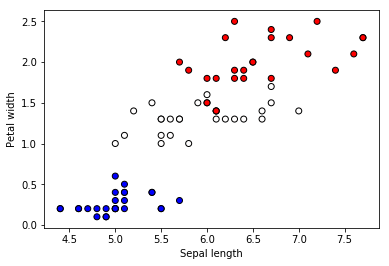

In [63]:
# Plot the training points
plt.scatter(data_train_2.iloc[:, 0], data_train_2.iloc[:, 1], c=data_train_2.iloc[:,2].values, cmap=plt.cm.bwr,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')

It appears that for our case, a linear classifier will not be able to perfectly separate the points. But it does appear that a linear classifier should seem to do relatively well here. 

Here we will use multinomial logistic regression and one-vs-rest (OvR) logistic regression methods for fitting a multiclass classifier. In OvR, a separate binary classifier is fit for each class, whereas in multinomial logistic regression a single classifier is fit for all classes.

In [64]:
X_train_2 = data_train_2[['slength', 'pwidth']]
y_train_2 = data_train_2['target']
X_test_2 = data_test_2[['slength', 'pwidth']]
y_test_2 = data_test_2['target']

Here, we will fit both a OvR logistic regression and Multinomial logistic regression model. Further, we will look at the training and testing accuracies.

In [65]:
logregcv = LogisticRegressionCV(multi_class='ovr')
logregcv.fit(X_train_2, y_train_2)
print("Train OvR:", logregcv.score(X_train_2, y_train_2))
print("Test OvR:", logregcv.score(X_test_2, y_test_2))
logregcv_2 = LogisticRegressionCV(multi_class='multinomial')
logregcv_2.fit(X_train_2, y_train_2)
print("Train Multinomial:", logregcv_2.score(X_train_2, y_train_2))
print("Test Multinomial:",logregcv_2.score(X_test_2, y_test_2))

Train OvR: 0.923076923077
Test OvR: 0.861111111111
Train Multinomial: 0.961538461538
Test Multinomial: 0.958333333333


Now, we show how to fit a Multiclass Logistic Regression model with cubic terms:

In [66]:
poly = PolynomialFeatures(3)
X_train_poly_cubic = poly.fit_transform(X_train_2)
X_test_poly_cubic = poly.fit_transform(X_test_2)

In [67]:
logregcv_cubic = LogisticRegressionCV()
logregcv_cubic.fit(X_train_poly_cubic, y_train_2)
print("Train LR Cubic Features OvR:", logregcv_cubic.score(X_train_poly_cubic, y_train_2))
print("Test LR Cubic Features OvR:", logregcv_cubic.score(X_test_poly_cubic, y_test_2))
logregcv_2_poly_cubic = LogisticRegressionCV(multi_class='multinomial')
logregcv_2_poly_cubic.fit(X_train_poly_cubic, y_train_2)
print("Train LR Cubic Features Multinomial:", logregcv_2_poly_cubic.score(X_train_poly_cubic, y_train_2))
print("Test LR Cubic Features Multinomial:",logregcv_2_poly_cubic.score(X_test_poly_cubic, y_test_2))

Train LR Cubic Features OvR: 0.961538461538
Test LR Cubic Features OvR: 0.930555555556
Train LR Cubic Features Multinomial: 0.961538461538
Test LR Cubic Features Multinomial: 0.958333333333


We can then compare our results to that given by LDA and QDA:

In [68]:
lda = LDA()
lda.fit(X_train_2, y_train_2)
print("Train LDA:", lda.score(X_train_2, y_train_2))
print("Test LDA:", lda.score(X_test_2, y_test_2))
qda = QDA()
qda.fit(X_train_2, y_train_2)
print("Train QDA:", qda.score(X_train_2, y_train_2))
print("Test QDA:",qda.score(X_test_2, y_test_2))

Train LDA: 0.961538461538
Test LDA: 0.958333333333
Train QDA: 0.961538461538
Test QDA: 0.958333333333


Finally, we cover the fitting of k-Nearest Neighbors for $k = 1,2$:

In [69]:
knn_1 = KNN(n_neighbors=1)
knn_1.fit(X_train_2, y_train_2)
print("Train KNN 1:", knn_1.score(X_train_2, y_train_2))
print("Test KNN 1:", knn_1.score(X_test_2, y_test_2))
knn_2 = KNN(n_neighbors=2)
knn_2.fit(X_train_2, y_train_2)
print("Train KNN 2:", knn_2.score(X_train_2, y_train_2))
print("Test KNN 2:", knn_2.score(X_test_2, y_test_2))

Train KNN 1: 0.974358974359
Test KNN 1: 0.930555555556
Train KNN 2: 0.961538461538
Test KNN 2: 0.930555555556


We will now move on to the Midterm 2 solutions from last year:

# Part I: Diagnosing the Simian Flu 2016

You are given the early data for an outbreak of a dangerous virus originating from a group of primates being kept in a Massechussetts biomedical research lab, this virus is dubbed the "Simian Flu".

You have the medical records of $n$ number of patients in `'flu_train.csv`. There are two general types of patients in the data, flu patients and healthy (this is recorded in the column labeled `flu`, a 0 indicates the absences of the virus and a 1 indicates presence). Furthermore, scientists have found that there are two strains of the virus, each requiring a different type of treatment (this is recorded in the column labeled `flutype`, a 1 indicates the absences of the virus, a 2 indicates presence of strain 1 and a 3 indicates the presence of strain 2).

**Your task:** build a model to predict if a given patient has the flu. Your goal is to catch as many flu patients as possible without misdiagnosing too many healthy patients.

**The deliverable:** a function called `flu_predict` which satisfies:

- input: `x_test`, a set of medical predictors for a group of patients
- output: `y_pred`, a set of labels, one for each patient; 0 for healthy and 1 for infected with the flu virus

The MA state government will use your model to diagnose sets of future patients (held by us). You can expect that there will be an increase in the number of flu patients in any groups of patients in the future.

We provide you with some benchmarks for comparison.

**Baseline Model:** 
- ~50% expected accuracy on healthy patients in observed data
- ~50% expected accuracy on flu patients in observed data
- ~50% expected accuracy on healthy patients in future data 
- ~50% expected accuracy on flu patients in future data
- time to build: 5 min

**Reasonable Model:** 
- ~69% expected accuracy on healthy patients in observed data
- ~55% expected accuracy on flu patients, in observed data
- ~69% expected accuracy on healthy patients in future data
- ~60% expected accuracy on flu patients, in future data
- time to build: 20 min

**Grading:**
Your grade will be based on:
1. your model's ability to out-perform our benchmarks
2. your ability to carefully and thoroughly follow the data science pipeline (see lecture slides for definition)
3. the extend to which all choices are reasonable and defensible by methods you have learned in this class

**Solutions:**

## Step 1: Read the data, clean and explore the data

There are a large number of missing values in the data. Nearly all predictors have some degree of missingness. Not all missingness are alike: as Mike points out, NaN in the `'pregnancy'` column is meaningful and informative, as patients with NaN's in the pregnancy column are males, where as NaN's in other predictors may appear randomly. 


**What we do:** We make no attempt to interpret the predictors and we make no attempt to model the missing values in the data in any meaningful way. We replace all missing values with 0.

However, it would be more complete to look at the data and allow the data to inform your decision on how to address missingness. For columns where NaN values are informative, you might want to treat NaN as a distinct value; You might want to drop predictors with too many missing values and impute the ones with few missing values using KNN or a parametric model. There are many acceptable strategies here, as long as the appropriateness of the method in the context of the task and the data is discussed.

In [70]:
#Train

df = pd.read_csv('https://raw.githubusercontent.com/cs109/a-2017/master/Midterms/2016%20Midterm%202/data/flu_train.csv')

df = df[~np.isnan(df['flu'])]

df.head()

,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,flu,flutype
0,51624,male,34,30-39,409.0,White,NaN,High School,Married,25000-34999,...,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN,0,1
1,51630,female,49,40-49,596.0,White,NaN,Some College,LivePartner,35000-44999,...,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN,0,1
2,51638,male,9,0-9,115.0,White,NaN,NaN,NaN,75000-99999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,51646,male,8,0-9,101.0,White,NaN,NaN,NaN,55000-64999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,51647,female,45,40-49,541.0,White,NaN,College Grad,Married,75000-99999,...,No,Yes,13.0,20.0,0.0,Yes,Bisexual,NaN,0,1


In [71]:
#Clean and encode

encode = preprocessing.LabelEncoder()

for column in df.columns:
    if df[column].dtype == np.object:
        df[column] = df[column].fillna('')
        df.loc[:, column] = encode.fit_transform(df[column])
        
df = df.fillna(0)

df.head()

,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,flu,flutype
0,51624,1,34,4,409.0,4,0,4,3,6,...,2,2,16.0,8.0,1.0,1,2,0,0,1
1,51630,0,49,5,596.0,4,0,5,2,7,...,2,2,12.0,10.0,1.0,2,2,0,0,1
2,51638,1,9,1,115.0,4,0,0,0,11,...,0,0,0.0,0.0,0.0,0,0,0,0,1
3,51646,1,8,1,101.0,4,0,0,0,9,...,0,0,0.0,0.0,0.0,0,0,0,0,1
4,51647,0,45,5,541.0,4,0,3,3,11,...,1,2,13.0,20.0,0.0,2,1,0,0,1


In [72]:
#Test

df_test = pd.read_csv('https://raw.githubusercontent.com/cs109/a-2017/master/Midterms/2016%20Midterm%202/data/flu_train.csv')

df_test = df_test[~np.isnan(df_test['flu'])]

df_test.head()

,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,flu,flutype
0,51624,male,34,30-39,409.0,White,NaN,High School,Married,25000-34999,...,Yes,Yes,16.0,8.0,1.0,No,Heterosexual,NaN,0,1
1,51630,female,49,40-49,596.0,White,NaN,Some College,LivePartner,35000-44999,...,Yes,Yes,12.0,10.0,1.0,Yes,Heterosexual,NaN,0,1
2,51638,male,9,0-9,115.0,White,NaN,NaN,NaN,75000-99999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,51646,male,8,0-9,101.0,White,NaN,NaN,NaN,55000-64999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,51647,female,45,40-49,541.0,White,NaN,College Grad,Married,75000-99999,...,No,Yes,13.0,20.0,0.0,Yes,Bisexual,NaN,0,1


In [73]:
#Clean and encode

encode = preprocessing.LabelEncoder()

for column in df_test.columns:
    if df_test[column].dtype == np.object:
        df_test[column] = df_test[column].fillna('')
        df_test.loc[:, column] = encode.fit_transform(df_test[column])
        
df_test = df_test.fillna(0)

df_test.head()

,ID,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,HHIncome,...,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow,flu,flutype
0,51624,1,34,4,409.0,4,0,4,3,6,...,2,2,16.0,8.0,1.0,1,2,0,0,1
1,51630,0,49,5,596.0,4,0,5,2,7,...,2,2,12.0,10.0,1.0,2,2,0,0,1
2,51638,1,9,1,115.0,4,0,0,0,11,...,0,0,0.0,0.0,0.0,0,0,0,0,1
3,51646,1,8,1,101.0,4,0,0,0,9,...,0,0,0.0,0.0,0.0,0,0,0,0,1
4,51647,0,45,5,541.0,4,0,3,3,11,...,1,2,13.0,20.0,0.0,2,1,0,0,1


In [74]:
#What's up in each set

x = df.values[:, :-2]
y = df.values[:, -2]

x_test = df_test.values[:, :-2]
y_test = df_test.values[:, -2]

print('x train shape:', x.shape)
print('x test shape:', x_test.shape)
print('train class 0: {}, train class 1: {}'.format(len(y[y==0]), len(y[y==1])))
print('train class 0: {}, train class 1: {}'.format(len(y_test[y_test==0]), len(y_test[y_test==1])))

x train shape: (5246, 74)
x test shape: (5246, 74)
train class 0: 4936, train class 1: 310
train class 0: 4936, train class 1: 310


## Step 2: Model Choice

The first task is to decide which, of the large number of classifiers we have learned during this semester, would best suit our task and our data.

It would be possible to do brute force model comparison here - i.e. tune all models and compare which does best with respect to various benchmarks. However, it is also reasonable to do a first round of model comparison by running models (with out of the box parameter settings) on the training data and eliminating models which performed very poorly. 

In [75]:
def expected_score(model, x_test, y_test):
    overall = 0
    class_0 = 0
    class_1 = 0
    for i in range(100):
        np.random.seed(i)
        sample = np.random.choice(len(x_test), len(x_test))
        x_sub_test = x_test[sample]
        y_sub_test = y_test[sample]
        
        overall += model.score(x_sub_test, y_sub_test)
        class_0 += model.score(x_sub_test[y_sub_test==0], y_sub_test[y_sub_test==0])
        class_1 += model.score(x_sub_test[y_sub_test==1], y_sub_test[y_sub_test==1])

    return pd.Series([overall / 100., 
                      class_0 / 100.,
                      class_1 / 100.],
                      index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])], 
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

In [76]:
#KNN
knn = KNN(n_neighbors=2)
knn.fit(x, y)

knn_scores = score(knn, x, y)
print('knn')

#Unweighted logistic regression
unweighted_logistic = LogisticRegression(C=1000)
unweighted_logistic.fit(x, y)

unweighted_log_scores = score(unweighted_logistic, x, y)
print('unweighted log')


#Weighted logistic regression
weighted_logistic = LogisticRegression(C=1000, class_weight='balanced')
weighted_logistic.fit(x, y)

weighted_log_scores = score(weighted_logistic, x, y)
print('weighted log')


#LDA
lda = LDA()
lda.fit(x, y)

lda_scores = score(lda, x, y)
print('lda')

#QDA
qda = QDA()
qda.fit(x, y)

qda_scores = score(qda, x, y)
print('qda')

#Decision Tree
tree = DecisionTree(max_depth=50, class_weight='balanced', criterion='entropy')
tree.fit(x, y)

tree_scores = score(tree, x, y)
print('tree')


#Random Forest
rf = RandomForest(class_weight='balanced')
rf.fit(x, y)

rf_scores = score(rf, x, y)

print('rf')

#SVC
svc = SVC(C=100, class_weight='balanced')
svc.fit(x, y)

svc_scores = score(svc, x, y)

print('svc')

knn
unweighted log
weighted log
lda
qda


/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


tree
rf
svc


In [77]:
#Score Dataframe
score_df = pd.DataFrame({'knn': knn_scores, 
                         'unweighted logistic': unweighted_log_scores,
                         'weighted logistic': weighted_log_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores,
                         'rf': rf_scores, 
                         'svc': svc_scores})
score_df

,knn,lda,qda,rf,svc,tree,unweighted logistic,weighted logistic
overall accuracy,0.945864,0.937476,0.858559,0.984369,1.0,1.0,0.941289,0.704346
accuracy on class 0,1.000000,0.985616,0.869327,1.000000,1.0,1.0,0.999797,0.705632
accuracy on class 1,0.083871,0.170968,0.687097,0.735484,1.0,1.0,0.009677,0.683871


It looks like we can rule out KNN, LDA and unweighted logistic. 

**What we do:** We are going to pick weighted logistic regression and just tune the regularization parameter to beat the test benchmarks. Can you figure out why we chose this course of action? Hint: Instead of looking at overall accuracy, look at accuracy on class 1. 

**What's probably good to do:** QDA, random forest, tree, SVC and weighted logistic are beating our train benchmarks as is. We will tune them to beat the test benchmarks by picking the model and parameter set with the highest CV accuracy.

In [78]:
Cs = 10.**np.arange(-3, 4, 1)
scores = []
for C in Cs:
    print('C:', C)
    weighted_log_scores = np.array([0., 0., 0.])
    kf = KFold(len(x), n_folds=10, shuffle=True, random_state=10)
    for train_index, test_index in kf:
        x_validate_train, x_validate_test = x[train_index], x[test_index]
        y_validate_train, y_validate_test = y[train_index], y[test_index]

        weighted_logistic = LogisticRegression(C=C, class_weight='balanced')
        weighted_logistic.fit(x_validate_train, y_validate_train)

        weighted_log_scores += score(weighted_logistic, x_validate_test, y_validate_test).values

    scores.append(weighted_log_scores / 10.)

scores = pd.DataFrame(np.array(scores).T, columns=[str(C) for C in Cs], index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

C: 0.001
C: 0.01
C: 0.1
C: 1.0
C: 10.0
C: 100.0
C: 1000.0


**What C means here:** The `C` parameter in the `LogisticRegression` method is the inverse of the regularization parameter $\lambda$. In other words, `C` $= \frac{1}{\lambda}$. As C gets larger, $\lambda$ is getting smaller. Therefore, when we set `C` to be very very large in our earlier homework assignments to make sure there was **no** regularization, this was the same as making $\lambda$ go to zero. When $\lambda$ is zero, there is no regularization applied.

In [79]:
scores

,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
overall accuracy,0.715398,0.702053,0.694617,0.694044,0.695762,0.695380,0.692521
accuracy on class 0,0.724678,0.710710,0.702634,0.701603,0.703431,0.702819,0.700215
accuracy on class 1,0.571205,0.569065,0.568667,0.574649,0.574465,0.576891,0.569549


To beat the future benchmark, we'll select the parameter which yields the highest accuracy on class 1 (while still beating the benchmark on class 0).

Now let's test our model on the test data:

In [80]:
#Weighted logistic regression
weighted_logistic = LogisticRegression(C=100, class_weight='balanced')
weighted_logistic.fit(x, y)
weighted_log_scores = score(weighted_logistic, x_test, y_test)
weighted_log_scores

overall accuracy       0.703584
accuracy on class 0    0.705024
accuracy on class 1    0.680645
dtype: float64

Yay, we beat all the benchmarks!

# Part II: Diagnosing Strains of the Simian Flu

From a public health perspective, we want to balance the cost of vaccinations, early interventions and the cost of treating flu complications of unvaccinated people. 

There are two different strains of the flu: strain 1 has a cheaper early intervention as well as a cheaper treatment for flu complications, but patients with strain 1 has a higher rate of developing complications if treated with the wrong intervention. Strain 2 has a more expensive early intervention as well as a more costly treatment for flu complications, but patients with strain 2 has a lower rate of developing complications if treated with the wrong intervention. With no intervention, flu patients develop complications at the same rate regardless of the strain. 

**Your task:** build a model to predict if a given patient has the flu and identify the flu strain. The state government of MA will use your model to inform public health policies: we will vaccinate people you've identified as healthy and apply corresponding interventions to patients with different strains of the flu. We have provided you with a function to compute the total expected cost of this policy decision that takes into account the cost of the vaccine, the interventions and the cost of the treatments for flu complications resulting from misdiagnosing patients. Your goal is to make sure your model produces a public health policy with the lowest associated expected cost.

**The deliverable:** a function called `flu_predict` which satisfies:

- input: `x_test`, a set of medical predictors for a group of patients
- output: `y_pred`, a set of labels, one for each patient; 1 for healthy, 2 for infected with strain 1, and 3 for infected with strain 2.

The MA state government will use your model to diagnose sets of future patients (held by us). You can expect that there will be an increase in the number of flu patients in any groups of patients in the future.

We provide you with some benchmarks for comparison.

**Three Baseline Models:** 
- expected cost on observed data: \$6,818,206.0, \$7,035,735.0, \$8,297,197.5
- time to build: 1 min

**Reasonable Model:** 
- expected cost on observed data: $6,300,000
- time to build: 20 min

**Grading:**
Your grade will be based on:
1. your model's ability to out-perform our benchmarks
2. your ability to carefully and thoroughly follow the data science pipeline (see lecture slides for definition)
3. the extend to which all choices are reasonable and defensible by methods you have learned in this class

In [81]:
#--------  cost
# A function that computes the expected cost of the public healthy policy based on the 
# classifications generated by your model
# Input: 
#      y_true (true class labels: 0, 1, 2)
#      y_pred (predicted class labels: 0, 1, 2)
# Returns: 
#      total_cost (expected total cost)

def cost(y_true, y_pred):
    cost_of_treatment_1 = 29500
    cost_of_treatment_2 = 45000
    cost_of_intervention_1 = 4150
    cost_of_intervention_2 = 4250
    cost_of_vaccine = 15
    
    prob_complications_untreated = 0.65
    prob_complications_1 = 0.30
    prob_complications_2 = 0.15
    
    trials = 1000    
    
    intervention_cost = cost_of_intervention_1 * len(y_pred[y_pred==1]) + cost_of_intervention_2 * len(y_pred[y_pred==2])

    vaccine_cost = cost_of_vaccine * len(y_pred[y_pred==0])
    
    false_neg_1 = ((y_true == 1) & (y_pred == 2)).sum()
    false_neg_2 = ((y_true == 2) & (y_pred == 1)).sum()
    
    untreated_1 = ((y_true == 1) & (y_pred == 0)).sum()    
    untreated_2 = ((y_true == 2) & (y_pred == 0)).sum()
    
    false_neg_1_cost = np.random.binomial(1, prob_complications_1, (false_neg_1, trials)) * cost_of_treatment_1
    false_neg_2_cost = np.random.binomial(1, prob_complications_2, (false_neg_2, trials)) * cost_of_treatment_2
    untreated_1_cost = np.random.binomial(1, prob_complications_untreated, (untreated_1, trials)) * cost_of_treatment_1
    untreated_2_cost = np.random.binomial(1, prob_complications_untreated, (untreated_2, trials)) * cost_of_treatment_2
    
    false_neg_1_cost = false_neg_1_cost.sum(axis=0)
    expected_false_neg_1_cost = false_neg_1_cost.mean()
    
    false_neg_2_cost = false_neg_2_cost.sum(axis=0)
    expected_false_neg_2_cost = false_neg_2_cost.mean()
    
    untreated_1_cost = untreated_1_cost.sum(axis=0)
    expected_untreated_1_cost = untreated_1_cost.mean()
    
    untreated_2_cost = untreated_2_cost.sum(axis=0)
    expected_untreated_2_cost = untreated_2_cost.mean()
    
    total_cost = vaccine_cost + intervention_cost + expected_false_neg_1_cost + expected_false_neg_2_cost + expected_untreated_1_cost + expected_untreated_2_cost
    
    return total_cost

We're just going to take the weighted logistic model, again, and tune the regularization parameter to both beat the benchmark on the observed data and minimize expected cost on unseen data (i.e. to prevent ***overfitting***). Instead of using 'balanced' class weights, we're using a custom weighting scheme for the three classes (this parameter should really be tuned!).

It would probally also be go through the whole "choosing a model, tuning these models"-process again, this time to minimize cost.

**Note:** Be aware that the cost is now sensitive to sample size! The smaller the pool of patients the less the cost. If you are evaluating cost on a held-out test set then you can artificially make the cost very small. The benchmarks we give are for the entire training set.

In [82]:
x = df.values[:, :-2]
y = df.values[:, -1]
y = y - 1

x_test = df_test.values[:, :-2]
y_test = df_test.values[:, -1]

y_test = y_test - 1

In [83]:
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1]), 
                                                 model.score(x_test[y_test==2], y_test[y_test==2]), 
                                                 cost(y_test, model.predict(x_test))],
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1', 'accuracy on class 2', 'total cost'])

In [84]:
Cs = 10.**np.arange(-3, 4, 1)
scores = []
for C in Cs:
    print('C:', C)
    weighted_log_scores = np.array([0., 0., 0., 0., 0.])
    kf = KFold(len(x), n_folds=10, shuffle=True, random_state=10)
    for train_index, test_index in kf:
        x_validate_train, x_validate_test = x[train_index], x[test_index]
        y_validate_train, y_validate_test = y[train_index], y[test_index]

        weighted_logistic = LogisticRegression(C=C, class_weight={0:0.7, 1:10, 2:10})
        weighted_logistic.fit(x_validate_train, y_validate_train)

        weighted_log_scores += score(weighted_logistic, x_validate_test, y_validate_test).values

    scores.append(weighted_log_scores / 10.)

scores = pd.DataFrame(np.array(scores).T, columns=[str(C) for C in Cs], index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1', 'accuracy on class 2', 'total cost'])

C: 0.001
C: 0.01
C: 0.1
C: 1.0
C: 10.0
C: 100.0
C: 1000.0


In [85]:
scores

,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
overall accuracy,0.930048,0.928904,0.929286,0.928333,0.927951,0.929095,0.929475
accuracy on class 0,0.984187,0.982758,0.982768,0.981745,0.981749,0.982970,0.982972
accuracy on class 1,0.069623,0.062262,0.064524,0.075595,0.065119,0.060119,0.073132
accuracy on class 2,0.074134,0.130087,0.133983,0.108225,0.099892,0.114177,0.099892
total cost,657048.050000,658235.900000,654322.300000,657130.500000,661399.300000,656825.250000,653456.600000


In [86]:
#Weighted logistic regression
weighted_logistic = LogisticRegression(C=100, class_weight={0:0.7, 1:10, 2:10})
weighted_logistic.fit(x, y)
weighted_log_scores = score(weighted_logistic, x, y)
weighted_log_scores

overall accuracy       9.321388e-01
accuracy on class 0    9.829822e-01
accuracy on class 1    1.013216e-01
accuracy on class 2    1.807229e-01
total cost             6.256906e+06
dtype: float64

In [87]:
#Weighted logistic regression
weighted_log_scores = score(weighted_logistic, x_test, y_test)
weighted_log_scores

overall accuracy       9.321388e-01
accuracy on class 0    9.829822e-01
accuracy on class 1    1.013216e-01
accuracy on class 2    1.807229e-01
total cost             6.259606e+06
dtype: float64

In [88]:
print('minimimum cost on train:', cost(y, y))
print('minimimum cost on test:', cost(y_test, y_test))

minimimum cost on train: 1368840.0
minimimum cost on test: 1368840.0


In [89]:
print('simple model cost on train:', cost(y, np.array([0] * len(y))))
print('simple model cost on test:', cost(y_test, np.array([0] * len(y_test))))

simple model cost on train: 6839171.0
simple model cost on test: 6854941.0


In [90]:
print('simple model cost on train:', cost(y, np.array([1] * len(y))))
print('simple model cost on test:', cost(y_test, np.array([1] * len(y_test))))

simple model cost on train: 22332410.0
simple model cost on test: 22334345.0


In [91]:
print('simple model cost on train:', cost(y, np.array([2] * len(y))))
print('simple model cost on test:', cost(y_test, np.array([2] * len(y_test))))

simple model cost on train: 24305541.5
simple model cost on test: 24298314.0


Yay! We beat the benchmarks on the observed data and did pretty well on test data!

# Autograding function

In [92]:
accuracy = lambda y_true, y_pred: (((y_true - y_pred) == 0).sum() * 1.) / len(y_true)

# function to check - did they beat our benchmarks?
# You can either pass it the flu_predict function the student wrote or the
# file name of the y-labels.
#
# predict: function of type (array -> array)
# pred_y_file_name: file name of where their predicted y-labels live
# data_preprocessing: if false x-train data will be fed to flu_predict with no processing if true data will be encoded with 0 filled in for NaN
# cost: if true computes the expect cost
# 
# return some string indicating result of comparison with benchmark

def beat_benchmark(flu_predict=None, pred_y_file_name=None, data_preprocessing=False):
    
    acc_bm_0 = .69
    acc_bm_1 = .60
    
    acc_rm_0 = .5
    acc_rm_1 = .5
    
    df_test = pd.read_csv('https://raw.githubusercontent.com/cs109/a-2017/master/Midterms/2016%20Midterm%202/data/flu_test.csv')
    df_test = df_test[~np.isnan(df_test['flu'])]
    df_test['flutype'] = df_test['flutype'] - 1
    
    y_true = df_test.values[:, -2]
    
    if flu_predict is not None:
        if data_preprocessing:                       
            encode = preprocessing.LabelEncoder()
            for column in df_test.columns:
                if df_test[column].dtype == np.object:
                    df_test.loc[:, column] = encode.fit_transform(df_test[column])

            df_test = df_test.fillna(0)
            
        x = df_test.values[:, :-2]
        
        y_pred = flu_predict(x)
        
    elif pred_y_file_name is not None:
        df_y_pred = pd.read_csv(pred_y_file_name)
        y_pred = df_y_pred.values[:, -1]
        
    else:
        return 'params ill-specified'
    
    acc_0 = accuracy(y_true[y_true == 0], y_pred[y_true == 0])
    acc_1 = accuracy(y_true[y_true == 1], y_pred[y_true == 1])
    
    if acc_0 > acc_rm_0 and acc_1 > acc_rm_1:
        print ('accuracies: {}, {}'.format(acc_0, acc_1))
        return "accuracy: beats all benchmarks :)"
    elif acc_0 > acc_bm_0 and acc_1 > acc_bm_1:
        print ('accuracies: {}, {}'.format(acc_0, acc_1))
        return "accuracy: beats only baseline models :/"
    else:
        print ('accuracies: {}, {}'.format(acc_0, acc_1))
        return "accuracy: beats no benchmarks :("

In [93]:
# Example 0: using the autograding function

def flu_predict(x):
    return np.array([0] * len(x))

print(beat_benchmark(flu_predict, data_preprocessing=False))

accuracies: 1.0, 0.0
accuracy: beats no benchmarks :(


In [94]:
# Example 1: using the autograding function
print(beat_benchmark(pred_y_file_name='https://raw.githubusercontent.com/cs109/a-2017/master/Midterms/2016%20Midterm%202/data/Example_1.csv'))

accuracies: 0.7191558441558441, 0.6112956810631229
accuracy: beats all benchmarks :)
